In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets load the boston house pricing dataset

In [19]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [20]:
#lets check the description of the dataset
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [21]:
#lets check the feature names
print(cali.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Preparing the Dataset

In [41]:
# Convert the data into a pandas dataframe
df = pd.DataFrame(cali.data, columns=cali.feature_names)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
df['Price (in $100,000s)'] = cali.target # adding the target column to the dataframe

In [43]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"Price (in $100,000s)"
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Implementing the model

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MedInc                20640 non-null  float64
 1   HouseAge              20640 non-null  float64
 2   AveRooms              20640 non-null  float64
 3   AveBedrms             20640 non-null  float64
 4   Population            20640 non-null  float64
 5   AveOccup              20640 non-null  float64
 6   Latitude              20640 non-null  float64
 7   Longitude             20640 non-null  float64
 8   Price (in $100,000s)  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [52]:
## Summarizing the stats of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"Price (in $100,000s)"
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [56]:
## to check for missing values
df.isnull().sum()

MedInc                  0
HouseAge                0
AveRooms                0
AveBedrms               0
Population              0
AveOccup                0
Latitude                0
Longitude               0
Price (in $100,000s)    0
dtype: int64

In [59]:
## Exploratory data analysis
## Correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"Price (in $100,000s)"
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
"Price (in $100,000s)",0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
# import seaborn as sns
# sns.pairplot(df)

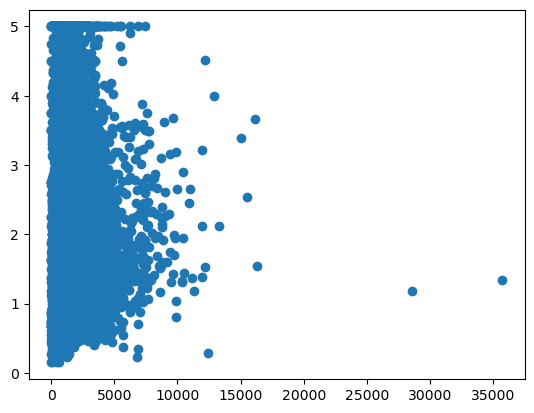

In [72]:
plt.scatter(df['Population'], df['Price (in $100,000s)'])
plt.show()

In [ ]:
#Independent and dependedent features and test train and splitting the data
from  sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [78]:
## stardardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [84]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
## pring the coeff and intercept
print(model.coef_)


[ 0.82955799  0.12192011 -0.27366196  0.32062002 -0.00413182 -0.03998331
 -0.91029471 -0.88451415]


In [91]:
print(model.intercept_)

2.077350641957363


In [92]:
#On which parameters the model has been trained
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [95]:
y_pred = model.predict(X_test)
print(f"predicted value: {y_pred} and actual value: {y_test}")

predicted value: [2.12567705 0.93977118 2.70887192 ... 2.9460839  2.63875476 1.46985176] and actual value: 4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
2319     0.682
5341     2.250
16888    3.500
6823     2.273
11878    1.417
Name: Price (in $100,000s), Length: 4128, dtype: float64


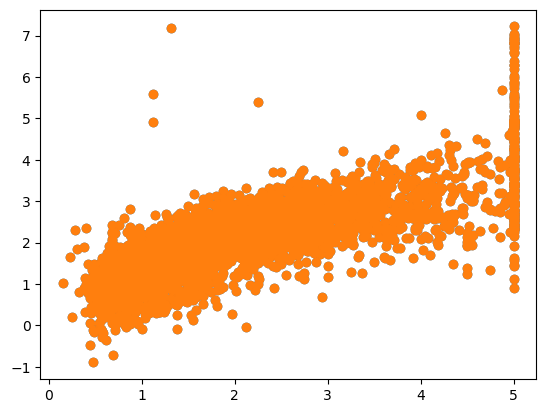

In [98]:
#Scatter plot for the predicted data
plt.scatter(y_test, y_pred)
plt.show()

In [107]:
#Scatter plot for the residuals/errs
err = y_test - y_pred
err

4712     1.424323
2151    -0.232771
15927   -0.414872
82      -0.587957
8161    -0.572805
           ...   
2319    -0.291345
5341     0.500148
16888    0.553916
6823    -0.365755
11878   -0.052852
Name: Price (in $100,000s), Length: 4128, dtype: float64

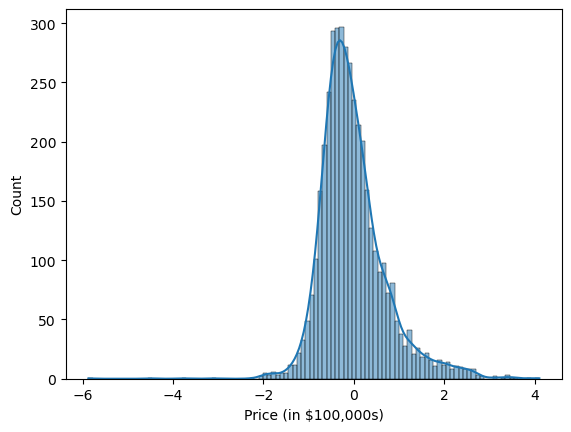

In [118]:
#plotting the errros
import seaborn as sns
sns.histplot(err, kde = True)
plt.show()

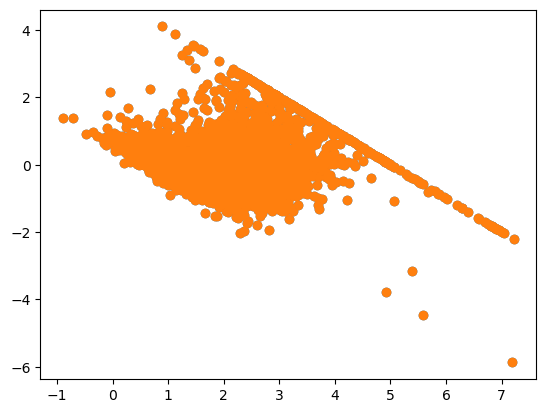

In [ ]:
##Scatter plot wrt to errors and predicted values
## uniform distribution of errors
plt.scatter(y_pred, err)
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.5328685121247784
Mean Squared Error: 0.529140234539731
Root Mean Squared Error: 0.7274202599183852
R2 Score: 0.5965968374812352


New Data prediction

In [137]:
#Reshaping the data to 2 Dimensional
two_D = cali.data[0].reshape(1, -1)
two_D.shape

(1, 8)

In [156]:
#standardizing the data and transforming the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(two_D)

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [157]:
# predicting the value
model.predict(two_D)

array([84.59884987])

Pickling the model file for Deployment

In [ ]:
import pickle
pickle.dump(model, open('regmodel.pkl', 'wb')) # wb = write-by

In [161]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [ ]:
#Prediction
pickled_model.predict(two_D)

array([84.59884987])